In [14]:
%matplotlib inline

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Generate Random Linear Distribution

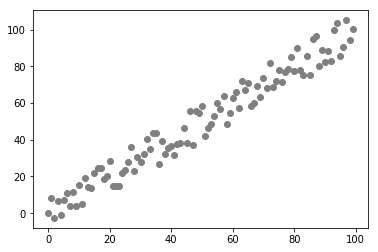

In [34]:
total_data = 100

x = np.arange(total_data)

np.random.shuffle(x)

delta = np.random.uniform(-10, 10, size = (total_data,))

y = x  + delta

plt.scatter(x, y, color = 'gray')

plt.xticks()
plt.yticks()

plt.show()

In [35]:
training_size = 0.8

total = x.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_x = x[:training_size]
validation_x = x[training_size:]

training_X = training_x.reshape((training_size, 1))
validation_X = validation_x.reshape((validation_size, 1))

training_y = y[:training_size]
validation_y = y[training_size:]

Best Epoch: [5, 32.223490813584746]


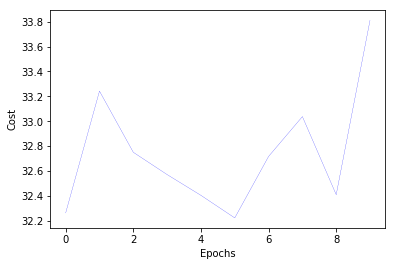

In [42]:
total_epoch = 10

regressor = linear_model.SGDRegressor(loss = "squared_loss", 
                                      max_iter = 1,
                                      learning_rate = "constant",
                                      penalty = None,
                                      eta0 = 0.00005)


select = float('inf')
best_epoch = None
best_model = None

epochs = []

for epoch in range(total_epoch):
    
    regressor.fit(training_X, training_y)
    prediction_y = regressor.predict(validation_X)
    mse = mean_squared_error(validation_y, prediction_y)
    
    if(mse < select):
        
        select = mse
        best_epoch = [epoch, mse]
        best_model = deepcopy(regressor)
    
    epochs.append([epoch, mse])
 

print("Best Epoch: " + str(best_epoch))

epochs = np.array(epochs)

plt.plot(epochs[:, 0:1], epochs[:, 1:2], linewidth = 0.2, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

In [43]:
prediction_y = best_model.predict(validation_X)

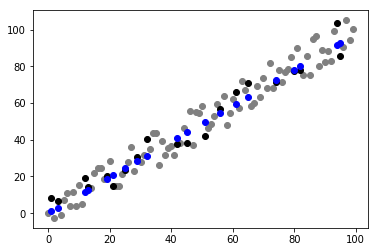

In [44]:
plt.scatter(training_x, training_y, color = 'grey')
plt.scatter(validation_x, validation_y, color = 'black')
plt.scatter(validation_x, prediction_y, color = 'blue')
#plt.plot(validation_x, prediction_y, color = 'blue', linewidth = 1)

plt.xticks()
plt.yticks()

plt.show()

Generate Random Exponential Data

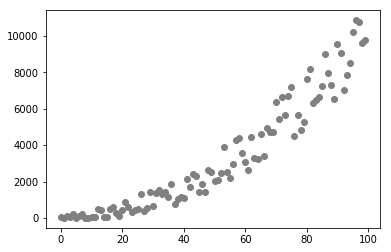

In [8]:
total_data = 100

x = np.arange(total_data)

np.random.shuffle(x)

delta = np.random.uniform(-10, 10, size = (total_data,))

y = np.power(x + delta, 2)

plt.scatter(x, y, color = 'gray')

plt.xticks()
plt.yticks()

plt.show()

In [9]:
polynomial_features = PolynomialFeatures(degree = 2, include_bias = False)

x = polynomial_features.fit_transform(x.reshape((total_data, 1)))

In [10]:
training_size = 0.8

total = x.shape[0]

training_size = round(total * training_size)
validation_size = total - training_size

training_X = x[:training_size]
validation_X = x[training_size:]

training_y = y[:training_size]
validation_y = y[training_size:]

Best Epoch: [309, 273294.6749526601]


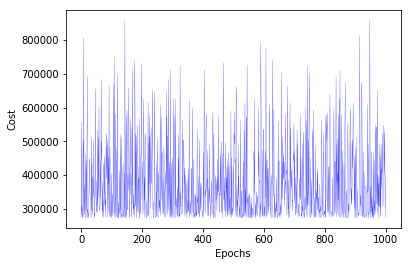

In [11]:
total_epoch = 1000

regressor = linear_model.SGDRegressor(loss = "squared_loss", 
                                      max_iter = 1,
                                      learning_rate = "constant",
                                      penalty = None,
                                      eta0 = 0.00000001)


select = float('inf')
best_epoch = None
best_model = None

epochs = []

for epoch in range(total_epoch):
    
    regressor.fit(training_X, training_y)
    prediction_y = regressor.predict(validation_X)
    mse = mean_squared_error(validation_y, prediction_y)
    
    if(mse < select):
        
        select = mse
        best_epoch = [epoch, mse]
        best_model = deepcopy(regressor)
    
    epochs.append([epoch, mse])
 

print("Best Epoch: " + str(best_epoch))

epochs = np.array(epochs)

plt.plot(epochs[:, 0:1], epochs[:, 1:2], linewidth = 0.2, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

In [12]:
prediction_y = best_model.predict(validation_X)
prediction_y

array([2.23401359e+02, 2.86916665e+02, 7.00076125e+03, 3.81412117e+03,
       8.96791577e+00, 6.19220366e+03, 1.28612575e+03, 2.58090230e+03,
       8.04721249e+01, 4.80425429e+02, 2.09970941e+03, 3.00156913e+03,
       4.86179379e+03, 3.97069838e+02, 3.45398041e+03, 3.57918922e+01,
       9.53734997e+02, 9.52859830e+03, 8.93208931e+02, 1.01624509e+03])

[0.01319729 0.99201424]
[0.00019573]


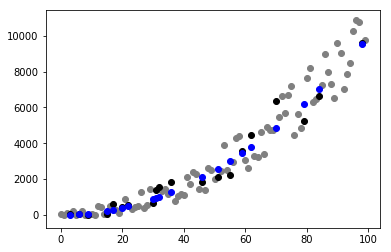

In [13]:
print(best_model.coef_)
print(best_model.intercept_)

plt.scatter(training_X[:, 0:1], training_y, color = 'grey')
plt.scatter(validation_X[:, 0:1], validation_y, color = 'black')
plt.scatter(validation_X[:, 0:1], prediction_y, color = 'blue')

plt.xticks()
plt.yticks()

plt.show()